<a href="https://colab.research.google.com/github/thgemanuel/Etapa-3_Topicos_especiais_em_IC/blob/main/Trabalho_final_Etapa_3_TIC_Thiago_Emanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição atividade

Definição da etapa:

a) A comparação e discussão dos resultados com diferentes formas de selecionar características; sugestão: https://scikit-learn.org/stable/modules/feature_selection.html além disso, regressão logística, árvore de decisão e PCA também pode ajudar

b) Correção/acréscimo ou discussão adicional diante das observações da parte 2.

# **Seleção e apresentação da base de dados**

1 - Base de dados *Predict Test Scores of students* 

> Este conjunto de dados consiste nas informações sobre um teste escrito por alguns alunos. Inclui características como: Ambiente escolar, tipo escolar, sexo, notas de pré-vestibulares, entre outros.

> ‎Tem o objetivo de obter diversas abordagens na previsão das pontuações pós-teste dos alunos.

> Possui 11 colunas.

> Realizar o procesos de regressão, com o objetivo de prever uma nota pós teste de um aluno.

*   [Kaggle - Predict Test Scores of students](https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students)





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files

from sklearn.model_selection import train_test_split


In [2]:
uploaded = files.upload()
ts = pd.read_csv(io.BytesIO(uploaded['test_scores.csv']))

Saving test_scores.csv to test_scores.csv


# Modelagem dos dados

## Pre-processamento

In [3]:
ts.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


In [4]:
df2 = ts.drop(['classroom','student_id'], axis = 1)
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [5]:
df2['school_type'] = df2['school_type'].str.replace('-', '_')
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non_public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non_public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non_public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non_public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non_public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [6]:
df2.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


# Verificar se existe algum atributo com tupla vazia

In [7]:
df2.isnull().sum()

school             0
school_setting     0
school_type        0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['school'] = label_encoder.fit_transform(df2['school'])
df2['school_setting'] = label_encoder.fit_transform(df2['school_setting'])
df2['school_type'] = label_encoder.fit_transform(df2['school_type'])
df2['teaching_method'] = label_encoder.fit_transform(df2['teaching_method'])
df2['gender'] = label_encoder.fit_transform(df2['gender'])
df2['lunch'] = label_encoder.fit_transform(df2['lunch'])
df2.head()


,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,2,0,1,20.0,0,0,62.0,72.0
1,0,2,0,1,20.0,0,0,66.0,79.0
2,0,2,0,1,20.0,1,0,64.0,76.0
3,0,2,0,1,20.0,0,0,61.0,77.0
4,0,2,0,1,20.0,1,0,64.0,76.0


# Análise Exploratória dos Dados

In [9]:
df2['n_student'].describe() 

count    2133.000000
mean       22.796531
std         4.228893
min        14.000000
25%        20.000000
50%        22.000000
75%        27.000000
max        31.000000
Name: n_student, dtype: float64

In [10]:
df2['pretest'].describe()

count    2133.000000
mean       54.955931
std        13.563101
min        22.000000
25%        44.000000
50%        56.000000
75%        65.000000
max        93.000000
Name: pretest, dtype: float64

In [11]:
df2['posttest'].describe()

count    2133.000000
mean       67.102203
std        13.986789
min        32.000000
25%        56.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: posttest, dtype: float64

## Porcentagem para cada valor dos atributos

In [12]:
for x in ["school_setting", "school_type", "teaching_method", "gender", "lunch"]:
    for val in df2[x].unique():
        qtd = df2[x].value_counts()[val]
        porcento = df2[x].value_counts(normalize=True)[val] * 100
        print(f"{val} -> Ocorrencias: {qtd}, Porcentagem: {porcento:.2f}%")
    print("-------------------------------------------")

2 -> Ocorrencias: 906, Porcentagem: 42.48%
1 -> Ocorrencias: 717, Porcentagem: 33.61%
0 -> Ocorrencias: 510, Porcentagem: 23.91%
-------------------------------------------
0 -> Ocorrencias: 551, Porcentagem: 25.83%
1 -> Ocorrencias: 1582, Porcentagem: 74.17%
-------------------------------------------
1 -> Ocorrencias: 1373, Porcentagem: 64.37%
0 -> Ocorrencias: 760, Porcentagem: 35.63%
-------------------------------------------
0 -> Ocorrencias: 1056, Porcentagem: 49.51%
1 -> Ocorrencias: 1077, Porcentagem: 50.49%
-------------------------------------------
0 -> Ocorrencias: 1215, Porcentagem: 56.96%
1 -> Ocorrencias: 918, Porcentagem: 43.04%
-------------------------------------------


Quando uma distribuição tem menor variabilidade, os valores em um conjunto de dados são mais consistentes. No entanto, quando a variabilidade é maior, os pontos de dados são mais diferentes e os valores extremos se tornam mais prováveis. Dessa forma, compreender a variabilidade ajuda a compreender a probabilidade de eventos incomuns.

Nesse gráfico do atributo 'n_student', possui uma inclinação para a direita, pois tem sua média maior do que sua mediana.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


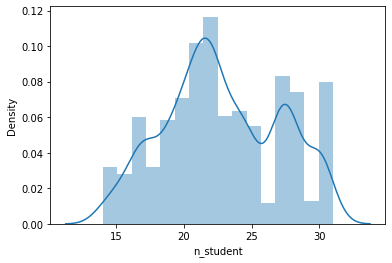

In [13]:
sns.distplot(df2["n_student"])

O gráfico abaixo é uma distribuição uniforme de valores no recurso de "pretest". Dessa forma, os valores médios e medianos são próximos um do outro.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


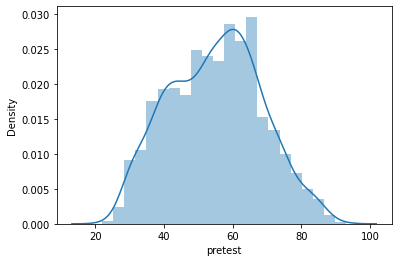

In [14]:
sns.distplot(df2["pretest"])

O gráfico abaixo é uma distribuição uniforme de valores no recurso "postest". Dessa forma, os valores médios e medianos são próximos um do outro.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


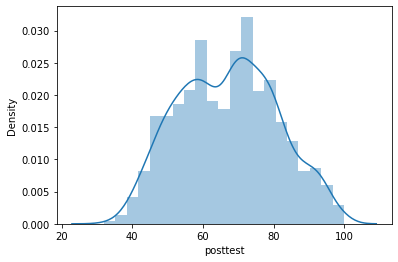

In [15]:
sns.distplot(df2["posttest"])

O grafico abaixo, mostra uma distribuição normal, portanto, os dados são bons para gerar um bom modelo de aprendizado de máquina.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


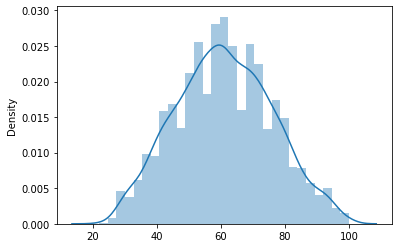

In [16]:
sns.distplot(df2[["pretest","posttest"]])

## Correlação

Esta função corr(), retorna um dataframe de correlação de pares entre as colunas. A partir da tabela, percebe-se uma correlação fraca entre as pontuações de "n_students" e o "pretest" / "posttest". Na diagonal os valores são iguais a 1, pois cada coluna está perfeitamente correlacionada consigo mesma.


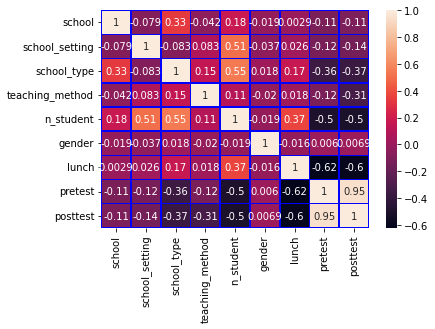

In [17]:
corr = df2.corr()
 
sns.heatmap(corr, annot=True, linewidth=.6, linecolor="blue")

plt.show()

In [18]:
# df2["pretest"] = df2["pretest"].astype('category')

# df2["posttest"] = df2["posttest"].astype('category')
# df2.dtypes

## Categorizando

In [19]:
pd.cut(df2.pretest, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts()

C    996
B    700
D    368
A     69
E      0
Name: pretest, dtype: int64

In [20]:
pd.cut(df2.posttest, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts()

B    1006
C     720
A     377
D      30
E       0
Name: posttest, dtype: int64

In [21]:
df2.describe()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,11.264885,1.185654,0.741678,0.643694,22.796531,0.504923,0.430380,54.955931,67.102203
std,6.516660,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,22.000000,32.000000
25%,6.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,44.000000,56.000000
50%,11.000000,1.000000,1.000000,1.000000,22.000000,1.000000,0.000000,56.000000,68.000000
75%,17.000000,2.000000,1.000000,1.000000,27.000000,1.000000,1.000000,65.000000,77.000000
max,22.000000,2.000000,1.000000,1.000000,31.000000,1.000000,1.000000,93.000000,100.000000


# Selecao com get_dummies

In [22]:
# features = pd.get_dummies(df2)

# X = features.drop('posttest', axis=1)
# y = features["posttest"]
# X.shape

## Seleção univariada de recursos

### Selecao com KBest

In [39]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_data = df2.drop('posttest', axis=1)
# y = df2["posttest"]

# X = SelectKBest(chi2, k=2).fit_transform(X_data, y)
# X.shape

(2133, 2)

### Selecao com ExtraTreesClassifier

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X_data = df2.drop('posttest', axis=1)
y = df2["posttest"]

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_data, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X = model.transform(X_data)
X.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(2133, 1)

*Criando os conjuntos de dados de treinamento e teste*

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Funcao para medir acurácia e avaliar metodos de regressão*

In [57]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

def test_score(y_test, y_pred):
    acuracia = explained_variance_score(y_test, y_pred) * 100
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    print(f"""Acurácia: {acuracia:.2f}""")
    print(f"""Erro médio absoluto: {mae:.2f}""")
  
    return acuracia

In [58]:
accuracy_scores = np.zeros(3, dtype="float64")

# Métodos Classificação

*Regressao Linear*

Acurácia: 90.42
Erro médio absoluto: 3.61


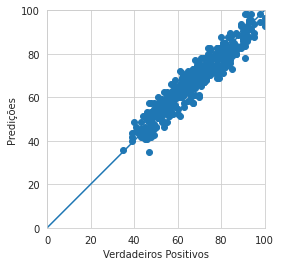

In [59]:
#Linear Regression
from sklearn.linear_model import LinearRegression

regRL = LinearRegression().fit(X_train, y_train)
ypLR = regRL.predict(X_test)
accuracy_scores[0]= test_score(y_test, ypLR)

a = plt.axes(aspect='equal')
plt.scatter(y_test, ypLR)
plt.xlabel('Verdadeiros Positivos')
plt.ylabel('Predições')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [60]:
print(pd.cut(y_test, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts())

B    191
C    141
A     90
D      5
E      0
Name: posttest, dtype: int64


In [61]:
print(pd.cut(ypLR, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts())

E      0
D      3
C    125
B    228
A     71
dtype: int64


*SVR (SVM para regressão)*

Acurácia: 90.65
Erro médio absoluto: 3.51


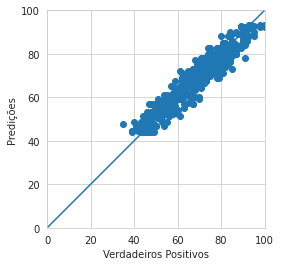

In [62]:
from sklearn.svm import SVR

regSVR = SVR().fit(X_train, y_train)
ypSVR = regSVR.predict(X_test)
accuracy_scores[1]= test_score(y_test, ypSVR)

a = plt.axes(aspect='equal')
plt.scatter(y_test, ypSVR)
plt.xlabel('Verdadeiros Positivos')
plt.ylabel('Predições')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [63]:
print(pd.cut(y_test, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts())

B    191
C    141
A     90
D      5
E      0
Name: posttest, dtype: int64


In [64]:
print(pd.cut(ypSVR, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts())

E      0
D      0
C    138
B    218
A     71
dtype: int64


*MPL (Redes neurais)*

Acurácia: 87.82
Erro médio absoluto: 3.95


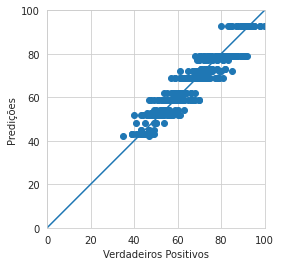

In [65]:
from sklearn.neural_network import MLPClassifier

regMLP = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='logistic')
regMLP.fit(X_train, y_train)

ypMLP=regMLP.predict(X_test)

accuracy_scores[2]= test_score(y_test, ypMLP)

a = plt.axes(aspect='equal')
plt.scatter(y_test, ypMLP)
plt.xlabel('Verdadeiros Positivos')
plt.ylabel('Predições')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [66]:
print(pd.cut(y_test, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts())

B    191
C    141
A     90
D      5
E      0
Name: posttest, dtype: int64


In [67]:
print(pd.cut(ypMLP, bins=[0,20,40,60,80,100], labels=['E','D', 'C', 'B', 'A']).value_counts())

E      0
D      0
C    149
B    245
A     33
dtype: int64


# Avaliação dos algorítmos

## Grafico para avaliação da acurácia dos 3 algoritmos

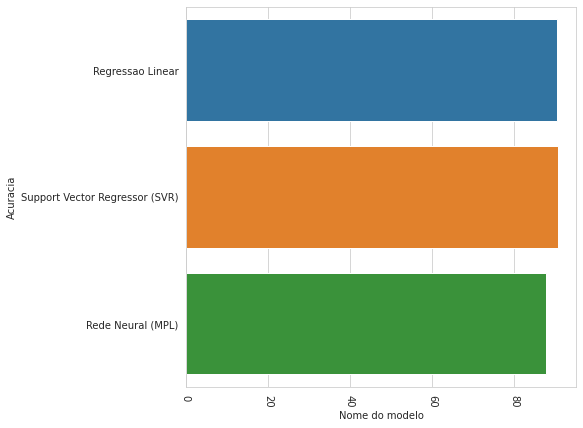

In [68]:
sns.set_style('whitegrid')
models = ["Regressao Linear","Support Vector Regressor (SVR)","Rede Neural (MPL)"]

plt.figure(figsize=(7, 7))
sns.barplot(x=accuracy_scores, y=models)


plt.xlabel("Nome do modelo")
plt.xticks(rotation = -90)
plt.ylabel("Acuracia")

plt.show()

## Grafico para avaliação do erro médio absoluto dos 3 algoritmos

<Figure size 216x216 with 0 Axes>

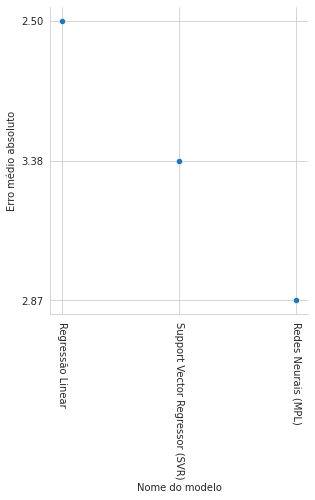

In [69]:
sns.set_style('whitegrid')
models = ["Regressão Linear","Support Vector Regressor (SVR)","Redes Neurais (MPL)"]

mae = ["2.50","3.38","2.87"]

plt.figure(figsize=(3, 3))
sns.relplot(x=models, y=mae)

plt.xlabel("Nome do modelo")
plt.xticks(rotation = -90)
plt.ylabel("Erro médio absoluto")

plt.show()